In [1]:
import pandas as pd
import pickle
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from plotnine import *
import plotnine as p9
import matplotlib.colors as colors
import matplotlib.pyplot as plt


def plot(rel_error,s1,fignum):
    rel_error_3strains_denovo_mean=np.mean(rel_error[2],axis=1)
    rel_error_3strains_denovo_std=np.std(rel_error[2],axis=1)
    rel_error_3strains_ref_mean=np.mean(rel_error[1],axis=1)
    rel_error_3strains_ref_std=np.std(rel_error[1],axis=1)
    rel_error_3strains_all_mean=np.mean(rel_error[0],axis=1)
    rel_error_3strains_all_std=np.std(rel_error[0],axis=1)

    df_rel = pd.DataFrame(data = rel_error_3strains_denovo_mean,columns=['Relative_error'])
    df_rel['std']=rel_error_3strains_denovo_std
    df_rel['Error type']=['de novo strains','de novo strains','de novo strains','de novo strains','de novo strains','de novo strains']
    df_rel['Model']=[r'($\bar{R}, \bar{K}, \bar{W}$)',r'($\bar{R}, K, \bar{W}$)',r'($R, \bar{K}, W$)',r'($R, \bar{K}, \bar{W}$)',r'($R, K, \bar{W}$)',r'($R, K, W$)']
    
    df_rel1= pd.DataFrame(data = rel_error_3strains_ref_mean,columns=['Relative_error'])
    df_rel1['std']=rel_error_3strains_ref_std
    df_rel1['Error type']=['reference strain','reference strain','reference strain','reference strain','reference strain','reference strain']
    df_rel1['Model']=[r'($\bar{R}, \bar{K}, \bar{W}$)',r'($\bar{R}, K, \bar{W}$)',r'($R, \bar{K}, W$)',r'($R, \bar{K}, \bar{W}$)',r'($R, K, \bar{W}$)',r'($R, K, W$)']
 
    df_rel2= pd.DataFrame(data = rel_error_3strains_all_mean,columns=['Relative_error'])
    df_rel2['std']=rel_error_3strains_all_std
    df_rel2['Error type']=['all strains','all strains','all strains','all strains','all strains','all strains']
    df_rel2['Model']=[r'($\bar{R}, \bar{K}, \bar{W}$)',r'($\bar{R}, K, \bar{W}$)',r'($R, \bar{K}, W$)',r'($R, \bar{K}, \bar{W}$)',r'($R, K, \bar{W}$)',r'($R, K, W$)']

    df_combined=pd.concat([df_rel,df_rel1])
    df_combined=pd.concat([df_combined,df_rel2])

 
    df_combined.to_csv(r'3strain_rel_error_melted_new.csv',index=False)
    g=ggplot(df_combined,aes(x='Model',y='Relative_error', fill = 'Error type'))+\
        ggtitle(s1)+geom_bar(stat = "summary", position="dodge")+\
        geom_errorbar(mapping=aes(x="Model", ymin="Relative_error",ymax="Relative_error+std"),stat = 'identity', position=position_dodge(0.9))+\
        p9.theme(subplots_adjust={'wspace':0.10})+theme_bw()+p9.theme(figure_size=(10, 4.8),axis_text=element_text(color='black'))+\
        p9.theme(title=element_text(size = 10),axis_text_x = element_text(size = 11),axis_text_y = element_text(size = 11),axis_title_y = element_text(size = 12),axis_title_x = element_text(size = 12),legend_text = element_text(size = 10),legend_title = element_text(size = 12))+\
        labs(x = "Heuristic combinations",y="relative error")+scale_fill_manual(values=['#31a354','#addd8e','#f7fcb9'])
    
    return g
    

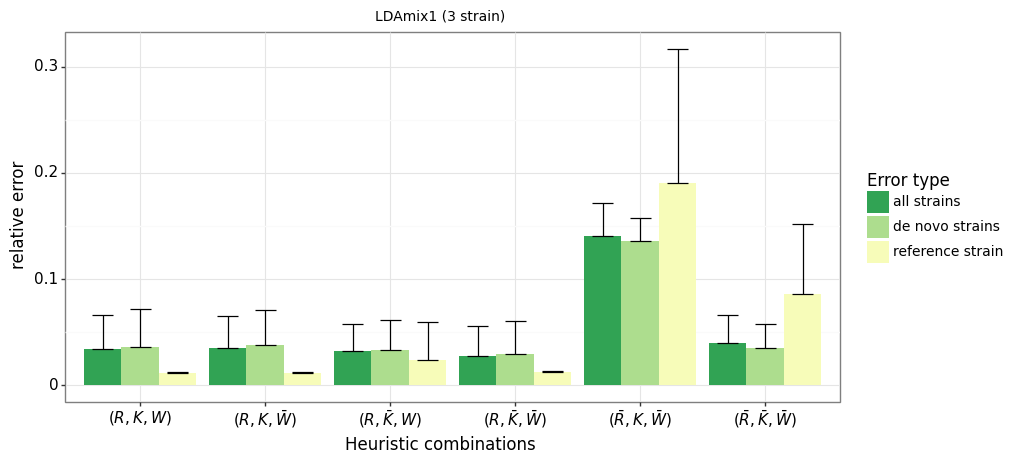

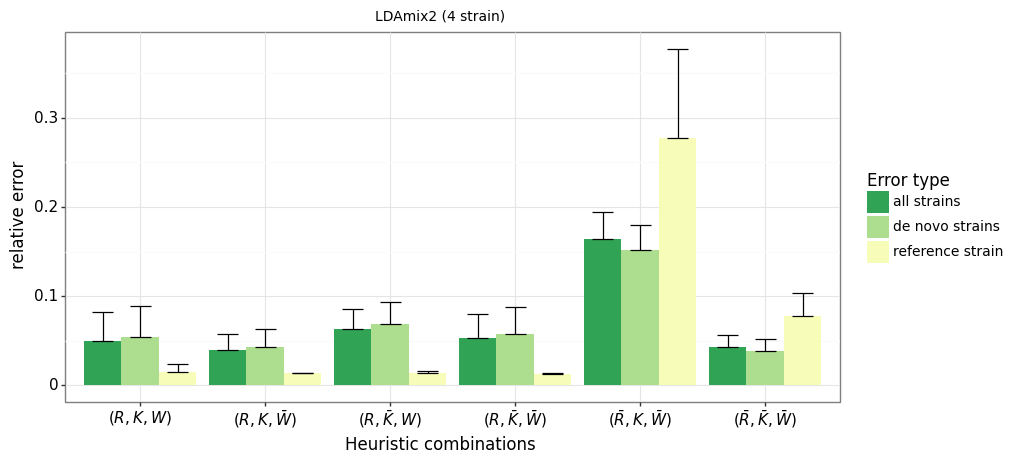

<ggplot: (8753744646653)>

In [2]:
with open('../simulation/simulation1/rel_error_3strains_ablation.pkl', 'rb') as f:

    rel_error=pickle.load(f)
f.close()
#print(rel_error)
g1=plot(rel_error,'LDAmix1 (3 strain)','a')

g1.draw()

with open('../simulation/simulation1/rel_error_4strains_ablation.pkl', 'rb') as f:

    rel_error=pickle.load(f)
f.close()
g2=plot(rel_error,'LDAmix2 (4 strain)','b')
g2

